<a href="https://colab.research.google.com/github/tommysalva/hodlers/blob/main/HODL_project_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
keras.utils.set_random_seed(42)

In [ ]:
!git clone https://github.com/tommysalva/hodlers.git

Cloning into 'hodlers'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Receiving objects: 100% (19/19), 30.12 MiB | 20.04 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
df_train = pd.read_csv('hodlers/data/sign_mnist_train.csv')
df_test = pd.read_csv('hodlers/data/sign_mnist_test.csv')

In [ ]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
y_train = df_train['label']
X_train = df_train.drop('label', axis=1)

y_test = df_test['label']
X_test = df_test.drop('label', axis=1)

# Preprocessing & Visualization

In [ ]:
# convert to (28, 28, 1) tensor
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape

(27455, 28, 28, 1)

In [ ]:
y_train.unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
letters = ('A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z').split(',')

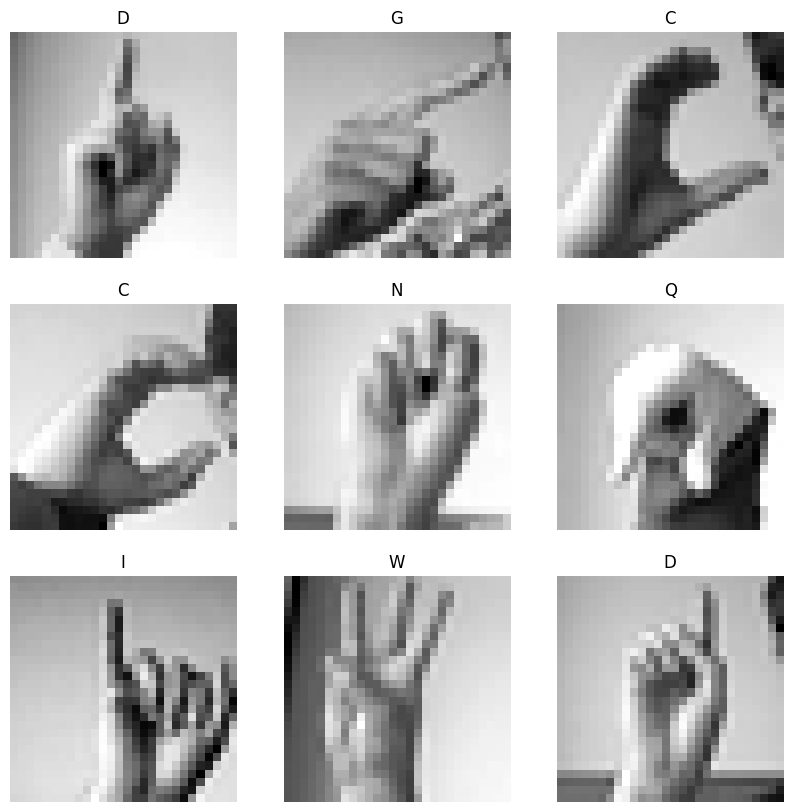

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
  ax = fig.add_subplot(3, 3, i+1)
  ax.set_title(f"{letters[y_train[i]]}")
  ax.imshow(X_train[i], cmap='gray')
  ax.axis('off')

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

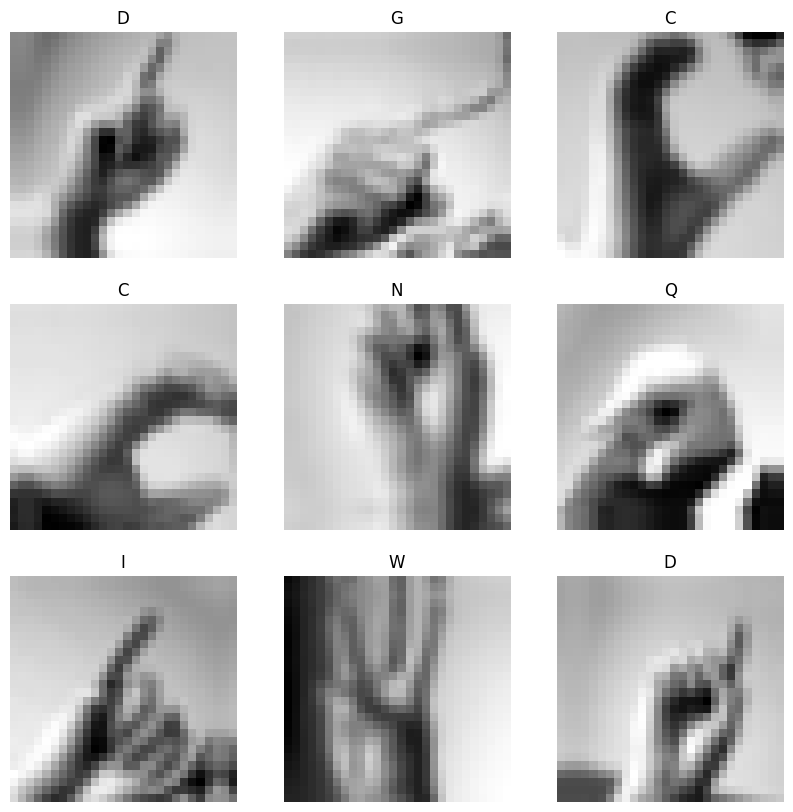

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
  ax = fig.add_subplot(3, 3, i+1)
  ax.set_title(f"{letters[y_train[i]]}")
  augmented_image = data_augmentation(X_train[i])
  ax.imshow(augmented_image, cmap='gray')
  ax.axis('off')

# CNN Model

In [ ]:
input = keras.layers.Input(shape=(28, 28, 1))

x = data_augmentation(input)
x = keras.layers.Rescaling(1./255)(input)
x = keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)

output = keras.layers.Dense(26, activation='softmax')(x)

model = keras.models.Model(input, output, name='CNN')
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 dropout_27 (Dropout)        (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        36928     
                                                               

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2
)

Epoch 1/30
344/344 [==============================] - 4s 7ms/step - loss: 2.0169 - accuracy: 0.3603 - val_loss: 1.0880 - val_accuracy: 0.7039
Epoch 2/30
344/344 [==============================] - 2s 6ms/step - loss: 0.7154 - accuracy: 0.7497 - val_loss: 0.5703 - val_accuracy: 0.8632
Epoch 3/30
344/344 [==============================] - 2s 6ms/step - loss: 0.4326 - accuracy: 0.8452 - val_loss: 0.3514 - val_accuracy: 0.9275
Epoch 4/30
344/344 [==============================] - 2s 6ms/step - loss: 0.2764 - accuracy: 0.9032 - val_loss: 0.2249 - val_accuracy: 0.9621
Epoch 5/30
344/344 [==============================] - 2s 6ms/step - loss: 0.1987 - accuracy: 0.9313 - val_loss: 0.1310 - val_accuracy: 0.9869
Epoch 6/30
344/344 [==============================] - 2s 6ms/step - loss: 0.1485 - accuracy: 0.9510 - val_loss: 0.1099 - val_accuracy: 0.9832
Epoch 7/30
344/344 [==============================] - 2s 6ms/step - loss: 0.1216 - accuracy: 0.9588 - val_loss: 0.0909 - val_accuracy: 0.9924
Epoch 

In [ ]:
def plot_accuracy(model_history):
  history_dict = model_history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training Accuracy', linewidth=2)
  plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', linewidth=2)
  plt.title("Training and Validation Accuracy Across Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

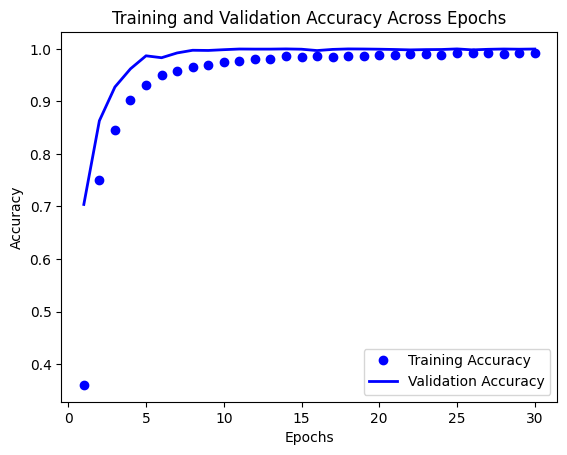

In [ ]:
plot_accuracy(model_history)

In [ ]:
score = model.evaluate(X_test, y_test)
print("Test accuracy: ", score[1])

225/225 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9607
Test accuracy:  0.9606804251670837
